In [4]:
#Linear Regression Via SKLearn
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt
import statistics
%matplotlib inline
import statsmodels.api as sm
import pylab
print("LOAD COMPLETE")

LOAD COMPLETE


In [16]:
data=datasets.load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
target=pd.DataFrame(data.target,columns=["MEDV"])
print("DATASET LOADED")
df.head()
# df2=pd.read_csv("startup_data.csv")
# df2.head()
# x2=df2[["R&D Spend","Administration","Marketing Spend"]]
# y2=df2[["Profit"]]

DATASET LOADED


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


       MEDV
0  6.003843
1  3.425562
2 -4.132403
3 -4.792964
4 -8.256476
MSE= MEDV    21.894831
dtype: float64
RMSE= MEDV    4.679191
dtype: float64
MEAN of y= MEDV    22.532806
dtype: float64
SCORE(R^2)= 0.7406426641094095


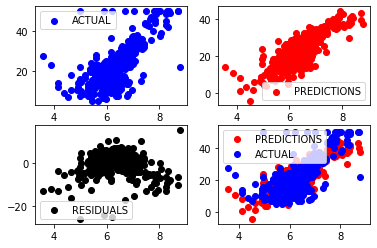

In [6]:
x=df
# print(x)
y=target
lm=linear_model.LinearRegression()
model=lm.fit(x,y)
predictions=lm.predict(x)
print((predictions-y)[:5])
print("MSE=",((predictions-y)**2).mean())
print("RMSE=",(((predictions-y)**2).mean())**0.5)
print("MEAN of y=",y.mean())
print("SCORE(R^2)=",lm.score(x,y))
residuals=predictions-y
#PLOTTING
fig=plt.figure
plt.subplot(2,2,1)
plt.scatter(df["RM"],y,color="blue",label="ACTUAL")
plt.legend()
plt.subplot(2,2,2)
plt.scatter(df["RM"],predictions,color="red",label="PREDICTIONS")
plt.legend()
plt.subplot(2,2,3)
plt.scatter(df["RM"],predictions-y,color="black",label="RESIDUALS")
plt.legend()
plt.subplot(2,2,4)
plt.scatter(df["RM"],predictions,color="red",label="PREDICTIONS")
plt.scatter(df["RM"],y,color="blue",label="ACTUAL")
plt.legend()

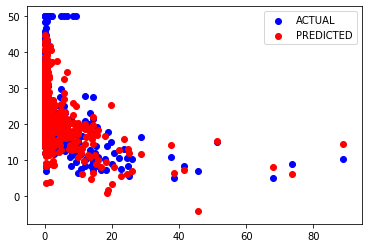

In [17]:
plt.scatter(x.iloc[:,0],y,color="blue",label="ACTUAL")
plt.scatter(x.iloc[:,0],predictions,color="red",label="PREDICTED")
plt.legend()

Text(0, 0.5, 'RESIDUALS')

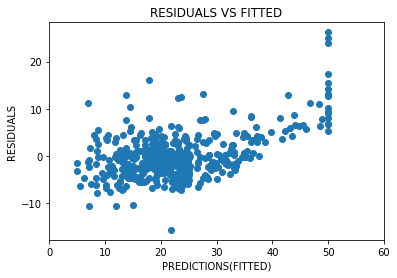

In [5]:
#No pattern in Residuals vs Fitted, So Non Linearity is not there
plt.xlim([0, 60])
plt.scatter(y,(y-predictions))
plt.title("RESIDUALS VS FITTED")
plt.xlabel("PREDICTIONS(FITTED)")
plt.ylabel("RESIDUALS")


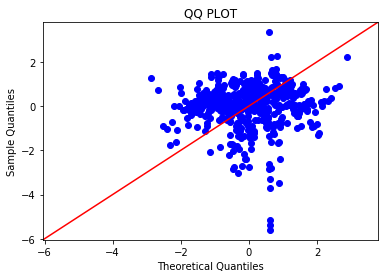

In [16]:
#QQ Plot or PROBPLOT
# test = np.random.normal(0,1, 1000)
res=residuals.values
stand_res=((res-res.mean())/np.std(res))
sm.qqplot(stand_res, line='45')
# sm.qqplot(res, line='45')
plt.title("QQ PLOT")
pylab.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


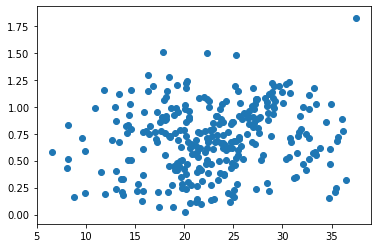

In [14]:
#No Such Pattern, this implies homoskedasticity is there , if heteroskedasticity is there funnel shape should be here
a=plt.figure()
a.figsize=((10,10))
stand_res_root=(stand_res)**0.5
plt.scatter(predictions,stand_res_root)

In [7]:
# calculating coefficients
coeff = df.columns
a=pd.DataFrame({"columns":df.columns,"coeff":lm.coef_[:][0]})
print(a)
print(coeff)
lm.coef_
# coeff['Coefficient Estimate'] = pd.Series([0][:])
# coeff

    columns      coeff
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [ ]:
a=plt.figure(figsize=(600,600))
plt.plot(df.columns,lm.coef_[0][:])

In [12]:
# corr=np.corrcoef(df,rowvar=0)
corr=df.corr()
print(corr)
W,V=np.linalg.eig(corr)
print(W)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [ ]:
import seaborn as sns
a=plt.figure(figsize=(600,600))
sns.heatmap(data=corr, annot=True)